In [1]:
import datetime as dt
import cartopy.crs as ccrs
import pandas as pd
import numpy as np



In [16]:
df = pd.read_pickle('los_20170908.pkl')

In [18]:
print(df.tail())

           gdlat    glon   tec  dtec    elm gps_site  sat_id  \
108842140  45.30 -110.34  1.72  0.95  34.72  b'p023'      11   
108842141  45.81 -120.06  3.07  0.38  44.67  b'p023'      13   
108842142  49.79 -124.31  3.16  1.22  18.60  b'p023'      15   
108842143  41.52 -116.97  2.30  0.18  40.16  b'p023'      17   
108842144  36.97 -119.62  2.74  0.28  16.10  b'p023'      19   

                     datetime  
108842140 2017-09-08 11:57:00  
108842141 2017-09-08 11:57:00  
108842142 2017-09-08 11:57:00  
108842143 2017-09-08 11:57:00  
108842144 2017-09-08 11:57:00  


In [2]:
df1 = pd.read_pickle('los_20170907.pkl')
print('df1 load')
df2 = pd.read_pickle('los_20170908.pkl')
print('df2 load')
df = pd.concat([df1, df2])
del df1
del df2

df1 load
df2 load


In [7]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                            df:  1.4 GiB
                          _iii:  637.0 B
                           _i4:  637.0 B
                           _i3:  636.0 B
                           _i7:  587.0 B
                           _oh:  232.0 B
                           Out:  232.0 B
                           _i2:  209.0 B
                           _i1:  136.0 B
                    sizeof_fmt:  136.0 B


In [4]:
print(df.head(15))

    gdlat   glon   tec  dtec    elm gps_site  sat_id            datetime
0   31.24 -92.00  5.56  0.05  76.68  b'lanr'      30 2017-09-07 11:56:00
1   40.70 -81.68  7.55  0.17  44.37  b'lans'       1 2017-09-07 11:56:00
2   40.66 -84.11  7.18  0.12  55.39  b'lans'       7 2017-09-07 11:56:00
3   45.24 -79.88  6.28  0.72  33.20  b'lans'       8 2017-09-07 11:56:00
4   42.47 -83.14  6.65  0.21  68.97  b'lans'      10 2017-09-07 11:56:00
5   42.19 -82.67  6.75  0.29  62.37  b'lans'      11 2017-09-07 11:56:00
6   44.90 -86.76  6.48  0.22  47.13  b'lans'      11 2017-09-07 11:56:00
7   39.11 -90.37  7.18  0.08  26.00  b'lans'      17 2017-09-07 11:56:00
8   51.89 -75.09  6.64  0.15   9.36  b'lans'      19 2017-09-07 11:56:00
9   43.73 -83.35  6.55  0.44  64.19  b'lans'      20 2017-09-07 11:56:00
10  40.81 -85.72  7.61  0.09  55.73  b'lans'      21 2017-09-07 11:56:00
11  43.87 -87.11  6.50  0.08  53.77  b'lans'      28 2017-09-07 11:56:00
12  42.43 -85.78  6.72  0.25  73.94  b'lans'      3

In [10]:
def plot_still(time, df):

    tecmap = plt.figure(figsize=(16, 10))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines(color='black', zorder=1)
    ax.gridlines()
    ax.set_extent([-130, -60, 30, 50], ccrs.PlateCarree())
    ax.add_feature(Nightshade(time, alpha=0.15))
    ax.set_title(str(time), size=30)
    part = df[df['datetime'] == time]


  
    mesh = ax.scatter(part.glon, part.gdlat, c=part['30min_detrend'] , transform=ccrs.PlateCarree(), vmin=-.2, vmax=.2, cmap='jet', s=3, alpha=.8)

    cbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
    cbar.set_label('dTEC')



In [4]:
start = dt.datetime(2017, 9, 7, 22, 59)
end = dt.datetime(2017, 9, 8, 3, 1)
extent = [20, 70, -140, -60]
df = df.where((df.datetime > start) & (df.datetime < end) & (df.gdlat > extent[0]) & (df.gdlat < extent[1]) & (df.glon > extent[2]) & (df.glon < extent[3])).dropna()


df['code'] = (df['gps_site'].str.decode('UTF-8') + '_' + df['sat_id'].astype(int).astype(str))
df = df.drop(columns = ['gps_site', 'sat_id'])

df = df.sort_values(by=['code', 'datetime'])
df['30min_detrend'] = df['tec'] - df.rolling(60, center=True, min_periods=1).mean().tec
df = df.where(df['elm'] > 30).dropna()

NameError: name 'df2' is not defined

In [6]:
print(df.head(30))

           gdlat   glon    tec  dtec    elm            datetime     code  \
100767001  32.21 -96.38  20.32  1.44  30.07 2017-09-07 23:19:00  1lsu_10   
100856653  32.23 -96.36  20.35  1.44  30.19 2017-09-07 23:19:30  1lsu_10   
100946327  32.24 -96.28  20.30  1.44  30.43 2017-09-07 23:20:00  1lsu_10   
101052759  32.25 -96.27  20.34  1.44  30.56 2017-09-07 23:21:00  1lsu_10   
101142213  32.26 -96.23  20.41  1.44  30.66 2017-09-07 23:21:30  1lsu_10   
101231808  32.28 -96.18  20.53  1.44  30.90 2017-09-07 23:22:00  1lsu_10   
101337821  32.28 -96.14  20.51  1.44  31.02 2017-09-07 23:23:00  1lsu_10   
101426878  32.30 -96.12  20.55  1.44  31.14 2017-09-07 23:23:30  1lsu_10   
101516081  32.31 -96.05  20.53  1.44  31.39 2017-09-07 23:24:00  1lsu_10   
101604787  32.32 -96.03  20.65  1.44  31.51 2017-09-07 23:24:30  1lsu_10   
101710351  32.32 -95.99  20.65  1.44  31.64 2017-09-07 23:25:30  1lsu_10   
101798992  32.34 -95.98  20.66  1.44  31.76 2017-09-07 23:26:00  1lsu_10   
101887829  3

In [8]:
df.to_pickle('tec.pkl')

NameError: name 'Nightshade' is not defined

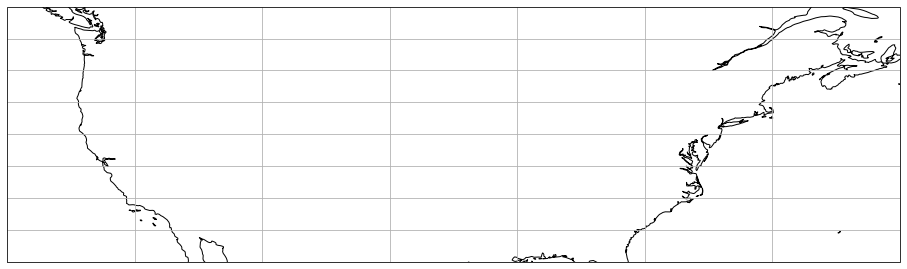

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

time = dt.datetime(2017, 9, 7, 23, 20)
plot_still(time, df)


# 